<a href="https://colab.research.google.com/github/DiploDatos/AnalisisyVisualizacion/blob/master/02_Estadistica_descriptiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2021**

---

# Estadística Descriptiva


In [1]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn

seaborn.set_context('talk')

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [2]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [3]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


# Estadística descriptiva

Hemos estado organizando y visualizando los datos de distintas maneras, pero ¿qué intuiciones podemos obtener?

Las visualizaciones como histogramas o gráficos de conteo muestran la cantidad de veces que se observa cada valor en un conjunto de realizaciones de una variable aleatoria. Esto se denomina análisis de frecuencia, y es parte de la **estadística descriptiva**.

El uso de visualizaciones nos limita a estimaciones, pero los datos crudos son demasiado como para intepretarlos en conjunto. Para eso, la estadística descriptiva provee también medidas de tendencia central y de dispersión, que resumen en un valor numérico propiedades de las realizaciones de la variable.

Retomemos el problema original con la v.a. `salary_monthly_NETO`, ¿qué información brindan las siguientes métricas y cómo usarlas?


In [4]:
salary_col='salary_monthly_BRUTO'

In [5]:
df[salary_col].describe().apply(lambda s: '{0:.2f}'.format(s))

count       6095.00
mean      124058.55
std       122912.35
min            1.00
25%        61595.00
50%        96000.00
75%       145000.00
max      2180000.00
Name: salary_monthly_BRUTO, dtype: object

## Medidas de tendencia central

Cuando se quiere obtener un valor representativo de todas las realizaciones de una v.a., o su centro, se utiliza una *medida de tendencia central*.

Repasando, dada X una v.a y un conjunto de realizaciones $x = \{ x_1, x_2 ... \}$ donde $x_i = X(\omega)$ para algún $\omega \in \Omega$, y $N = |x|$:

* La **media muestral** (aritmética) o promedio se calcula como:

$$ \bar{x} = \frac{1}{N} \sum_i^N x_i $$

* La **mediana** se calcula:
  1. Ordenar las realizaciones tal que $x_j \leq x_{j+1}$ 
  2. Si la cantidad de datos $N$ es impar, la mediana es el valor central: $median = x_{\lfloor N / 2 \rfloor +1}$
  3. Si la cantidad de datos $N$ es par, la mediana es e promedio de los dos valores centrales: $median = \frac{1}{2} (x_{ N / 2 } + x_{ (N / 2) +1})$

* La **moda** son los valores con mayor frecuencia, es decir, los que más se repite.


In [6]:
df[salary_col].mean(), df[salary_col].median()

(124058.54962132896, 96000.0)

**¿Por qué las dos medidas son tan distintas?**

Propiedades de la media:
* Se puede interpretar como el *centro de masa* del histograma. Es decir, si el histograma fuera una figura de madera, el punto de equilibrio donde podemos apoyarlo y no se cae es la media.
* Es muy sensible a valores extremos. [Opcional] ¿Por qué? Ver filminas

**¿Se cumple para estos datos?**

In [7]:
max_salaries = [df[salary_col].max(), 10**6, 500000, 400000, 300000, 200000]
central_tendency = [
    (max_salary, df[df[salary_col] < max_salary][salary_col].mean(),
     df[df[salary_col] < max_salary][salary_col].median())
    for max_salary in max_salaries
]
central_tendency

[(2180000.0, 123721.17819855596, 96000.0),
 (1000000, 120723.13043954599, 96000.0),
 (500000, 112145.56938829432, 95000.0),
 (400000, 107991.96966661021, 94000.0),
 (300000, 102223.41686622654, 92000.0),
 (200000, 91461.11102857141, 88000.0)]

Se pueden graficar estos números para lograr una mejor intuición de la magnitud de las diferencias. Además, al mostrar una visualización se pueden incluir más puntos.

Para poder crear gráficos de seaborn con distintos grupos de datos, muchas veces es necesario cambiar el formato del dataframe de wide a long. Ver [este link](https://anvil.works/blog/tidy-data) para más información.

In [8]:
central_tendency_max = [
    (max_salary, df[df[salary_col] < max_salary][salary_col].mean(),
     df[df[salary_col] < max_salary][salary_col].median())
    for max_salary in range(50000, int(df[salary_col].max()), 10**4)
]
central_tendency_max_df = pd.DataFrame(central_tendency_max,
                                   columns=['max_salary', 'mean', 'median'])\
  .melt(id_vars='max_salary', var_name='metric')

central_tendency_max_df[:3]

,max_salary,metric,value
0,50000,mean,30339.534775
1,60000,mean,37032.451850
2,70000,mean,44179.526605


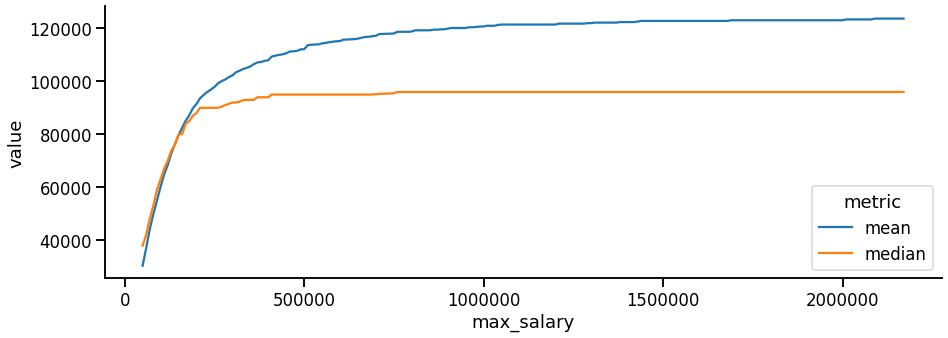

In [9]:
# ¡Podemos ver estos datos visualmente!
fig = plt.figure(figsize=(15, 5))
seaborn.lineplot(data=central_tendency_max_df, x='max_salary', y='value', hue='metric')
plt.ticklabel_format(style='plain', axis='x')
seaborn.despine()

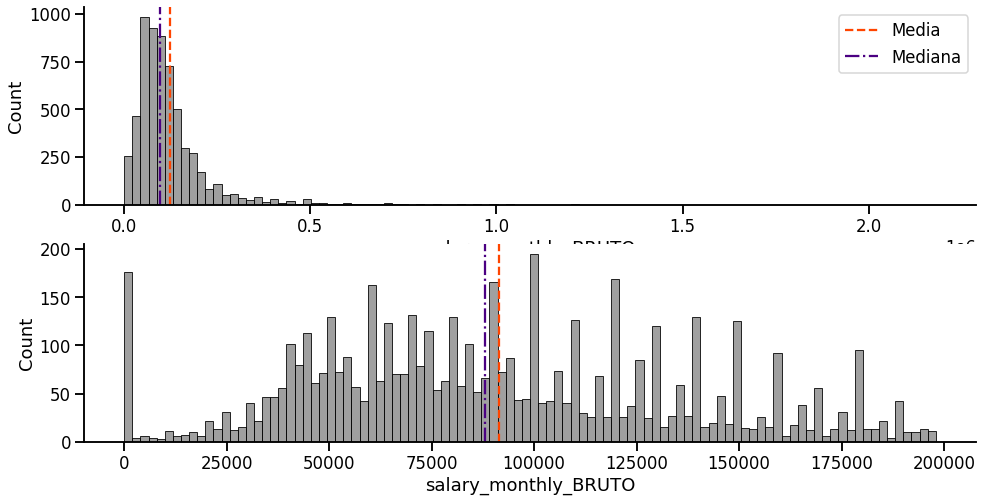

In [10]:
## La diferencia no siempre se aprencia en los gráficos
fig, axes = plt.subplots(nrows=2, figsize=(16, 8))
seaborn.histplot(df[salary_col], bins=100, ax=axes[0], color='gray')
axes[0].axvline(df[salary_col].mean(), color='orangered',
            linestyle='--', label='Media')
axes[0].axvline(df[salary_col].median(), color='indigo',
            linestyle='-.', label='Mediana')

filtered_df = df[df[salary_col] < 200000]
seaborn.histplot(filtered_df[salary_col], bins=100, ax=axes[1], color='gray')
axes[1].axvline(filtered_df[salary_col].mean(), color='orangered',
            linestyle='--', label='Media')
axes[1].axvline(filtered_df[salary_col].median(), color='indigo',
            linestyle='-.', label='Mediana')

axes[0].legend()
seaborn.despine()

¿Qué decir de la moda? Sólo que el resultado de la función no es un valor, sino una series de valores, aunque la serie tenga un único elemento.

In [11]:
df.profile_gender.mode()

0    Hombre
dtype: object

## Medidas de dispersión

Las medidas de dispersión vistas en el teórico son la desviación estándar, la varianza, y el coeficiente de variación. También permiten representar con un número alguna propiedad de los datos.

Por ejemplo, comparemos el salario neto con el salario bruto. A priori, **¿deberíamos ver alguna diferencia?**

In [12]:
df[['salary_monthly_NETO', 'salary_monthly_BRUTO']].describe().round()

,salary_monthly_NETO,salary_monthly_BRUTO
count,5883.0,6095.0
mean,94908.0,124059.0
std,96862.0,122912.0
min,1.0,1.0
25%,51480.0,61595.0
50%,78000.0,96000.0
75%,106000.0,145000.0
max,2080000.0,2180000.0


Claramente, ambas distribuciones están centradas en valores distintos, pero ¿podemos decir algo sobre su dispersión?

Como estamos hablando de dos v.a. distintas, no podemos comparar directamente los valores de las desviaciones estándar, sino que tenemos que usar el coeficiente de variación.

In [13]:
import scipy

print("Coeficiente de variación salario bruto",
      scipy.stats.variation(df.salary_monthly_BRUTO))
print("Coeficiente de variación salario neto",
      scipy.stats.variation(df.salary_monthly_NETO.dropna()))

Coeficiente de variación salario bruto 0.9906795521353624
Coeficiente de variación salario neto 1.0205048799041485


## Percentiles y gráficos de caja

Los gráficos de caja son otra forma de representar la distribución de las realizaciones de una v.a. numérica, de una forma más condensada que un histograma.

Son muy útiles para comparar muchas distribuciones, pero sólo cuando son muy distintas entre ellas, ya que oscurecen algunas sutilezas. Otros problema de este tipo de gráficos es que *no todo el mundo recuerda cómo leerlos*.

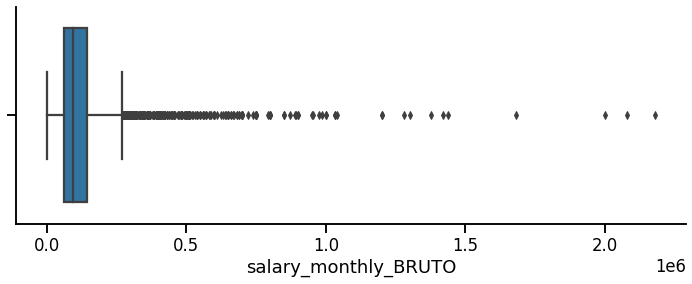

In [14]:
plt.figure(figsize=(12, 4))
seaborn.boxplot(x=df[salary_col])
seaborn.despine()

<AxesSubplot:xlabel='profile_age'>

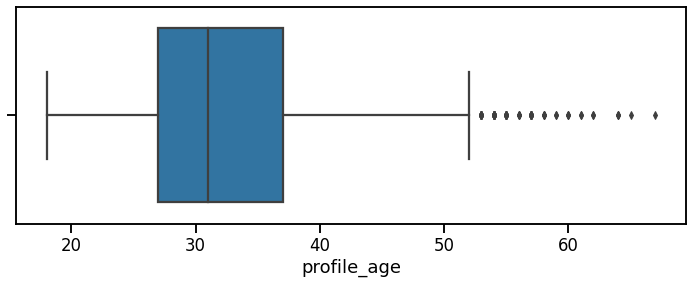

In [15]:
plt.figure(figsize=(12, 4))
seaborn.boxplot(x=df[df.profile_age < 100].profile_age)

Por ejemplo, podemos comparar la distribución de los salarios netos con respecto al nivel de estudios alcanzado.

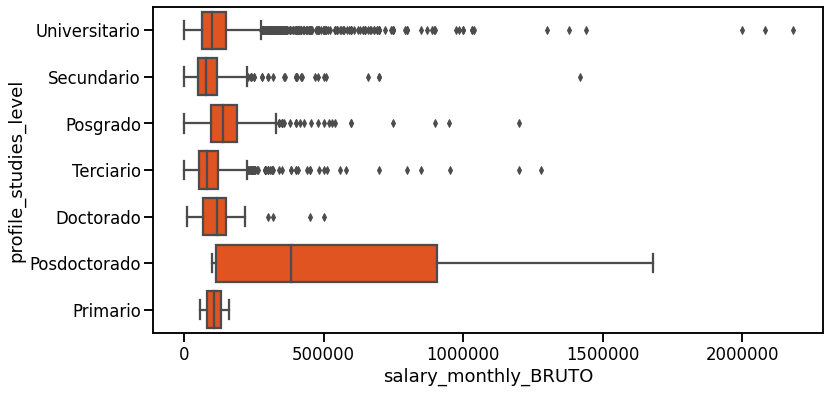

In [16]:
plt.figure(figsize=(12, 6))
seaborn.boxplot(data=df, x=salary_col, y='profile_studies_level',
                color='orangered')
plt.ticklabel_format(style='plain', axis='x')

**¿Qué puede estar causando una diferencia tan grande en la distribución para las respuestas que dicen Posdoctorado?**

### Boxenplots

Los boxplots tienen una gran desventaja: ocultan mucha información en la distribución de las colas. Por ejemplo, para la categoría Posdoctorado, sabemos que el 25% de los valores de sueldo neto es mayor que los ~650000 pesos. Pero no conocemos cómo se distribuyen. Para conjuntos de datos de gran tamaño, el 25% de los datos contiene mucha información.

Un gráfico más informativo es el **boxenplot**, que visualiza más percentiles. Otra ventaja es la percepción del mismo debido al peso visual de las cajas: los datos en el rango intercuartílico no parecen muuuucho más importantes que los datos en las colas.

Sin embargo, es aún más difícil de leer si buscamos exactitud, ya que los percentiles que definen el límite de cada caja se definen recursivamente y no decrecen linealmente.

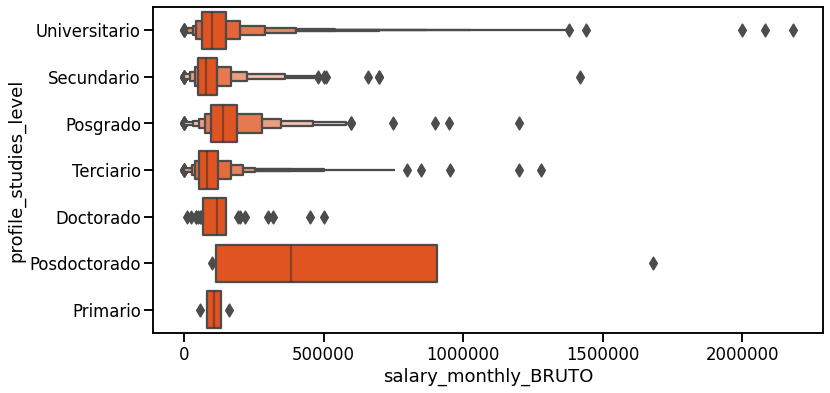

In [17]:
plt.figure(figsize=(12, 6))
seaborn.boxenplot(data=df, x=salary_col, y='profile_studies_level',
                color='orangered')
plt.ticklabel_format(style='plain', axis='x')

In [70]:

#print(sum(prim), sum(b), sum(d),sum(e),sum(f),sum(g),sum(h))

## Eliminación de valores extremos

### Usando percentiles 

Una forma conservadora de eliminar valores extremos que estén afectando a la media, el rango y las visualizaciones es seleccionar un cierto porcentaje más extremo. Para eso, usamos los percentiles.

Por ejemplo, podemos elegir quedarnos con el 99% de salarios más bajos, eliminando el 1%. Podemos calcular todos los percentiles para decidir cuál sería el más apropiado.

In [19]:
df[salary_col].quantile([.95, .98, .99, .995, .998])

0.950     307150.0
0.980     480000.0
0.990     630600.0
0.995     796240.0
0.998    1032671.0
Name: salary_monthly_BRUTO, dtype: float64

<AxesSubplot:xlabel='salary_monthly_BRUTO'>

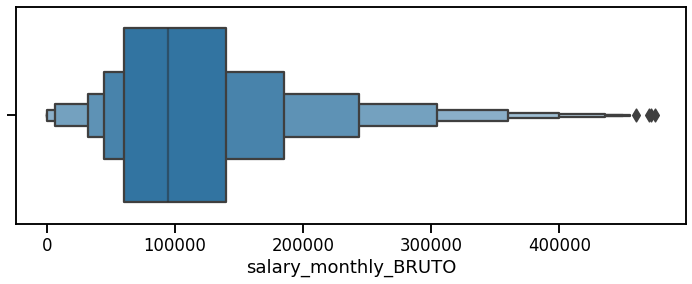

In [20]:
plt.figure(figsize=(12, 4))
max_limit = df[salary_col].quantile(.98)
seaborn.boxenplot(x=df[df[salary_col] < max_limit][salary_col])

<AxesSubplot:xlabel='salary_monthly_BRUTO'>

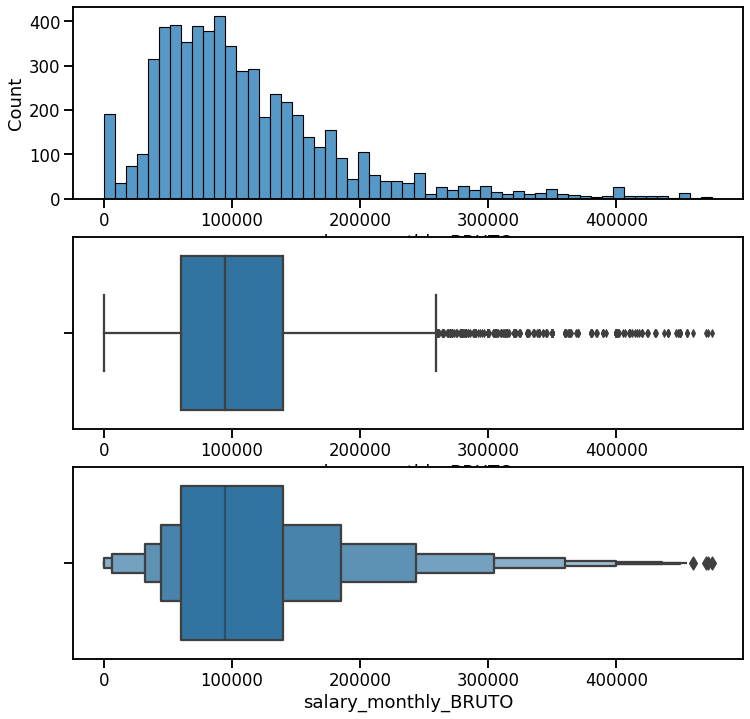

In [21]:
fig, axes = plt.subplots(figsize=(12, 12), nrows=3)
max_limit = df[salary_col].quantile(.98)
data = df[df[salary_col] < max_limit][salary_col]
seaborn.histplot(x=data, ax=axes[0])
seaborn.boxplot(x=data, ax=axes[1])
seaborn.boxenplot(x=data, ax=axes[2])

### Rango itercuartílico

In [22]:
df1 = df.drop(df[(df.profile_studies_level == "Primario") | (df.profile_studies_level == "Posdoctorado")].index)


In [23]:
def clean_outliers(dataset, column_name):
    """Returns dataset removing the outlier rows from column @column_name."""
    interesting_col = dataset[column_name]
    # Here we can remove the outliers from both ends, or even add more restrictions.
    mask_outlier = (
        numpy.abs(interesting_col - interesting_col.mean()) <= (2.5 * interesting_col.std()))
    return dataset[mask_outlier]

<AxesSubplot:xlabel='salary_monthly_BRUTO'>

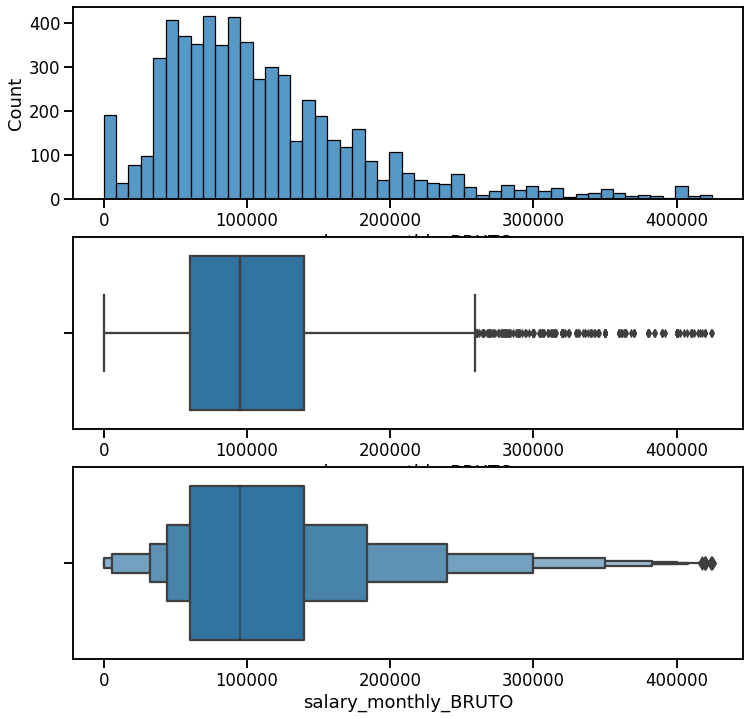

In [24]:
fig, axes = plt.subplots(figsize=(12, 12), nrows=3)
max_limit = df[salary_col].quantile(.98)
data = clean_outliers(df1, salary_col)[salary_col]
seaborn.histplot(x=data, ax=axes[0])
seaborn.boxplot(x=data, ax=axes[1])
seaborn.boxenplot(x=data, ax=axes[2])

In [73]:
df2 = clean_outliers(df1, salary_col)

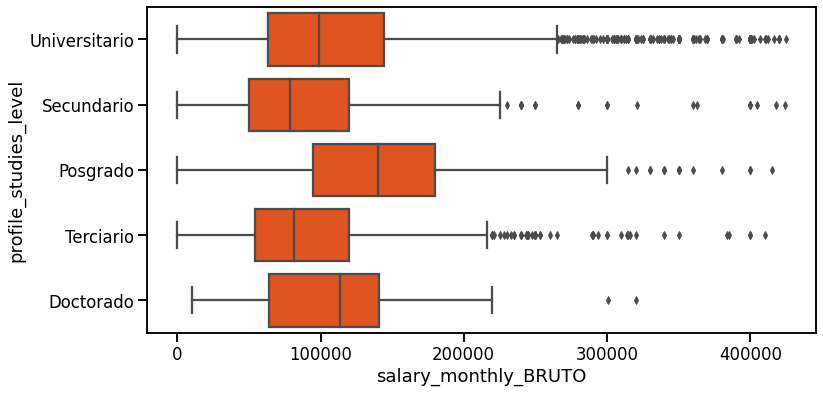

In [110]:
plt.figure(figsize=(12, 6))
seaborn.boxplot(data=df2, x='salary_monthly_BRUTO', y='profile_studies_level',
                color='orangered')
plt.ticklabel_format(style='plain', axis='x')

Calculo la probabilidad de que cada nivel de estudio cobre un sueldo por arriba de la media de salario

In [106]:
doc = df2.profile_studies_level == "Doctorado"
sec = df2.profile_studies_level == "Secundario"
ter = df2.profile_studies_level == "Terciario"
posg = df2.profile_studies_level == "Posgrado"
univ = df2.profile_studies_level == "Universitario"
studies = [doc, sec, ter, posg, univ]
studies_str = ['doc', 'sec', 'ter', 'posg', 'univ']
studies_dic = {'doc' : doc, 'sec' : sec, 'ter' : ter, 'posg' : posg, 'univ' : univ}


avg_salary = df2[salary_col].mean()
is_above_avg = df2[salary_col] > avg_salary
def intersec_avgsal_stud(stud):
    return len(df2[stud & is_above_avg])

stulvl_prob_dic = {}
for studlvl_str,stulvl in studies_dic.items():
    p_stulvl_avgsal = intersec_avgsal_stud(stulvl)/len(stulvl)
    stulvl_prob_dic.update({studlvl_str : p_stulvl_avgsal})

stulvl_prob_dic

{'doc': 0.00235729920862098,
 'sec': 0.021552449907391816,
 'ter': 0.05809058764101701,
 'posg': 0.0350227310995117,
 'univ': 0.291126452264691}

Qué es un posgrado? Según la UBA un Doctorado, Maestría y posdoc son posgrados, entonces....???

### ¡Mirando los datos!

¿Quiénes son los que cobran tanto?

In [27]:
df[df[salary_col] > df[salary_col].quantile(0.98)]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
261,Hombre,37,Argentina,Ciudad Autónoma de Buenos Aires,21.0,10.0,10.0,17,Universitario,Incompleto,...,Jamás,Heterosexual,NaN,NaN,5001-10000,Producto basado en Software,9,9,"Abono de celular, Capacitaciones y/o cursos, C...",NaN
318,Hombre,40,Argentina,Santa Fe,4.0,0.0,0.0,0,Posdoctorado,Completado,...,Jamás,¿Qué les importa?,NaN,NaN,1001-2000,Servicios / Consultoría de Software / Digital,8,10,"Capacitaciones y/o cursos, Horarios flexibles,...",NaN
437,Hombre,36,Argentina,Ciudad Autónoma de Buenos Aires,17.0,4.0,4.0,15,Universitario,Incompleto,...,En un trabajo anterior,¿Qué les importa?,NaN,No,1001-2000,Producto basado en Software,7,10,"Clases de gimnasia online, Comidas pagas / sub...",NaN
453,Hombre,34,Argentina,GBA,14.0,4.0,2.0,0,Universitario,Completado,...,En un trabajo anterior,Oveja,NaN,No,11-50,Servicios / Consultoría de Software / Digital,10,8,Vacaciones flexibles (adicionales a las reglam...,Airbnb
467,Hombre,26,Argentina,Córdoba,6.5,1.5,1.5,0,Universitario,Completado,...,Jamás,Heterosexual,NaN,No,201-500,Producto basado en Software,10,10,"Horarios flexibles, Vacaciones flexibles (adic...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819,Hombre,35,Argentina,Ciudad Autónoma de Buenos Aires,10.0,10.0,10.0,0,Universitario,En curso,...,Jamás,Heterosexual,NaN,NaN,2001-5000,Otras industrias,9,8,"Abono de Internet, Capacitaciones y/o cursos, ...",NaN
5844,Hombre,28,Argentina,Ciudad Autónoma de Buenos Aires,8.0,0.0,8.0,0,Universitario,En curso,...,En un trabajo anterior,Heterosexual,NaN,NaN,201-500,Producto basado en Software,9,9,"Capacitaciones y/o cursos, Clases de gimnasia ...",NaN
5878,Hombre,54,Argentina,Ciudad Autónoma de Buenos Aires,36.0,34.0,8.0,2500,Posgrado,Completado,...,Jamás,Heterosexual,NaN,NaN,10001+,Otras industrias,7,5,"Abono de celular, Capacitaciones y/o cursos, C...",NaN
5880,Hombre,36,Argentina,Ciudad Autónoma de Buenos Aires,14.0,4.0,1.0,30,Posgrado,Completado,...,Jamás,Heterosexual,NaN,NaN,2001-5000,Producto basado en Software,9,10,"Clases de gimnasia online, Clases de idiomas, ...",NaN
